In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

df = pd.read_csv('../datos/originales/mexico_importaciones.csv')
ndf = df.drop(['Regimen','Vía','U$ FOB Unit 2','U$ FOB Unit 1','Unid 2','Qty 2','Unid 1','Ciudad Exportador','NroSerie','DUA','Descripcion Partida Aduanera','Partida Aduanera'], axis=1)
df['Year'] = pd.to_datetime(df['Fecha'], dayfirst=True).dt.year

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Partida Aduanera              12 non-null     int64  
 1   Descripcion Partida Aduanera  12 non-null     object 
 2   Aduana                        12 non-null     object 
 3   DUA                           12 non-null     object 
 4   NroSerie                      12 non-null     int64  
 5   Fecha                         12 non-null     object 
 6   Cod. Tributario               12 non-null     object 
 7   Importador                    12 non-null     object 
 8   Ciudad Importador             7 non-null      object 
 9   Dirección Importador          12 non-null     object 
 10  Estado Importador             7 non-null      object 
 11  Exportador                    9 non-null      object 
 12  Ciudad Exportador             0 non-null      float64
 13  Direcci

          País Origen    Qty 1
0           NICARAGUA  70000.0
1  ZONA FRANCA MÉXICO    600.0


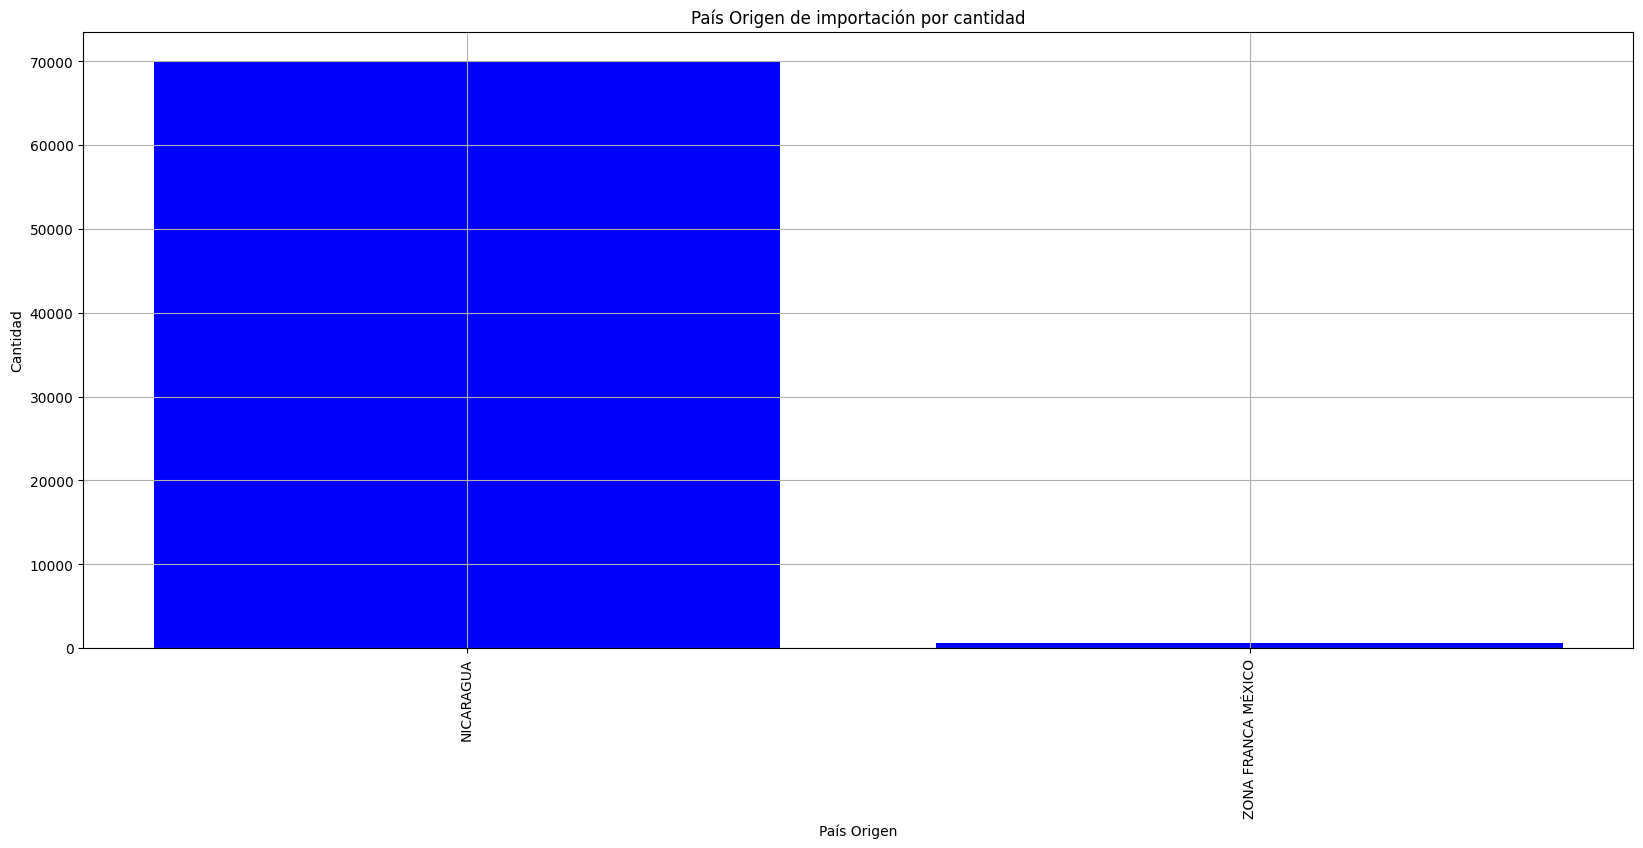

In [2]:
sum_by_pais = ndf.groupby('País Origen')['Qty 1'].sum().reset_index().sort_values(by='Qty 1', ascending=False)
print(sum_by_pais)

plt.figure(figsize = (20,8))

plt.bar(sum_by_pais['País Origen'], sum_by_pais['Qty 1'], color='blue')
plt.xlabel("País Origen")
plt.ylabel("Cantidad")
plt.title("País Origen de importación por cantidad")
plt.xticks(rotation=90)

plt.grid()
plt.show()

   Year    Qty 1
0  2019  20600.0
1  2020  25000.0
2  2021  25000.0


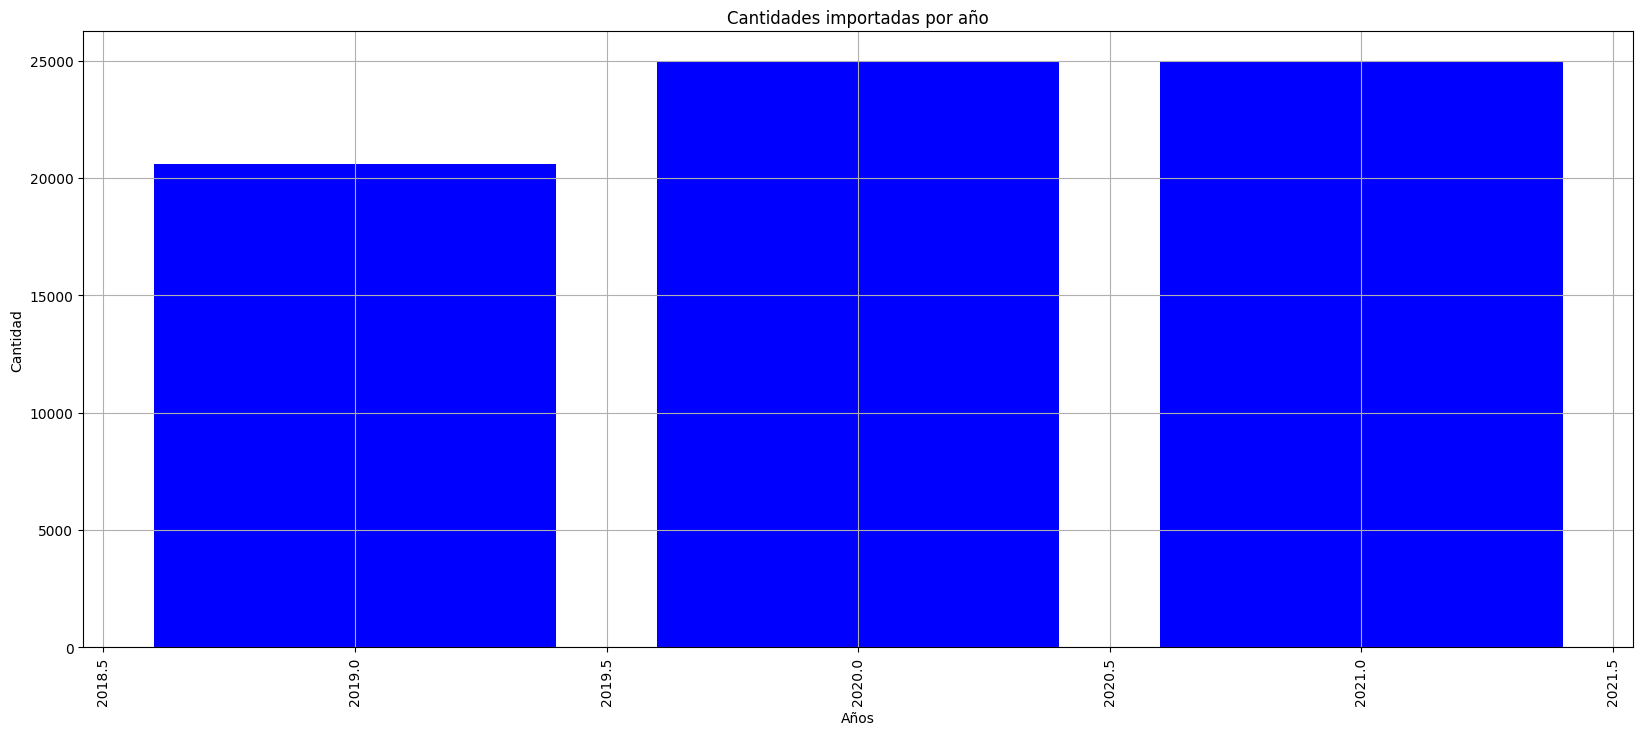

In [5]:
importacion_por_anio = df.groupby('Year')['Qty 1'].sum().reset_index()
print(importacion_por_anio)

plt.figure(figsize = (20,8))

plt.bar(importacion_por_anio['Year'], importacion_por_anio['Qty 1'], color='blue')
plt.xlabel("Años")
plt.ylabel("Cantidad")
plt.title("Cantidades importadas por año")
plt.xticks(rotation=90)

plt.grid()
plt.show()

Year  País Origen       
2019  NICARAGUA             20000.0
      ZONA FRANCA MÉXICO      600.0
2020  NICARAGUA             25000.0
2021  NICARAGUA             25000.0
Name: Qty 1, dtype: float64


<Axes: xlabel='Year,País Origen'>

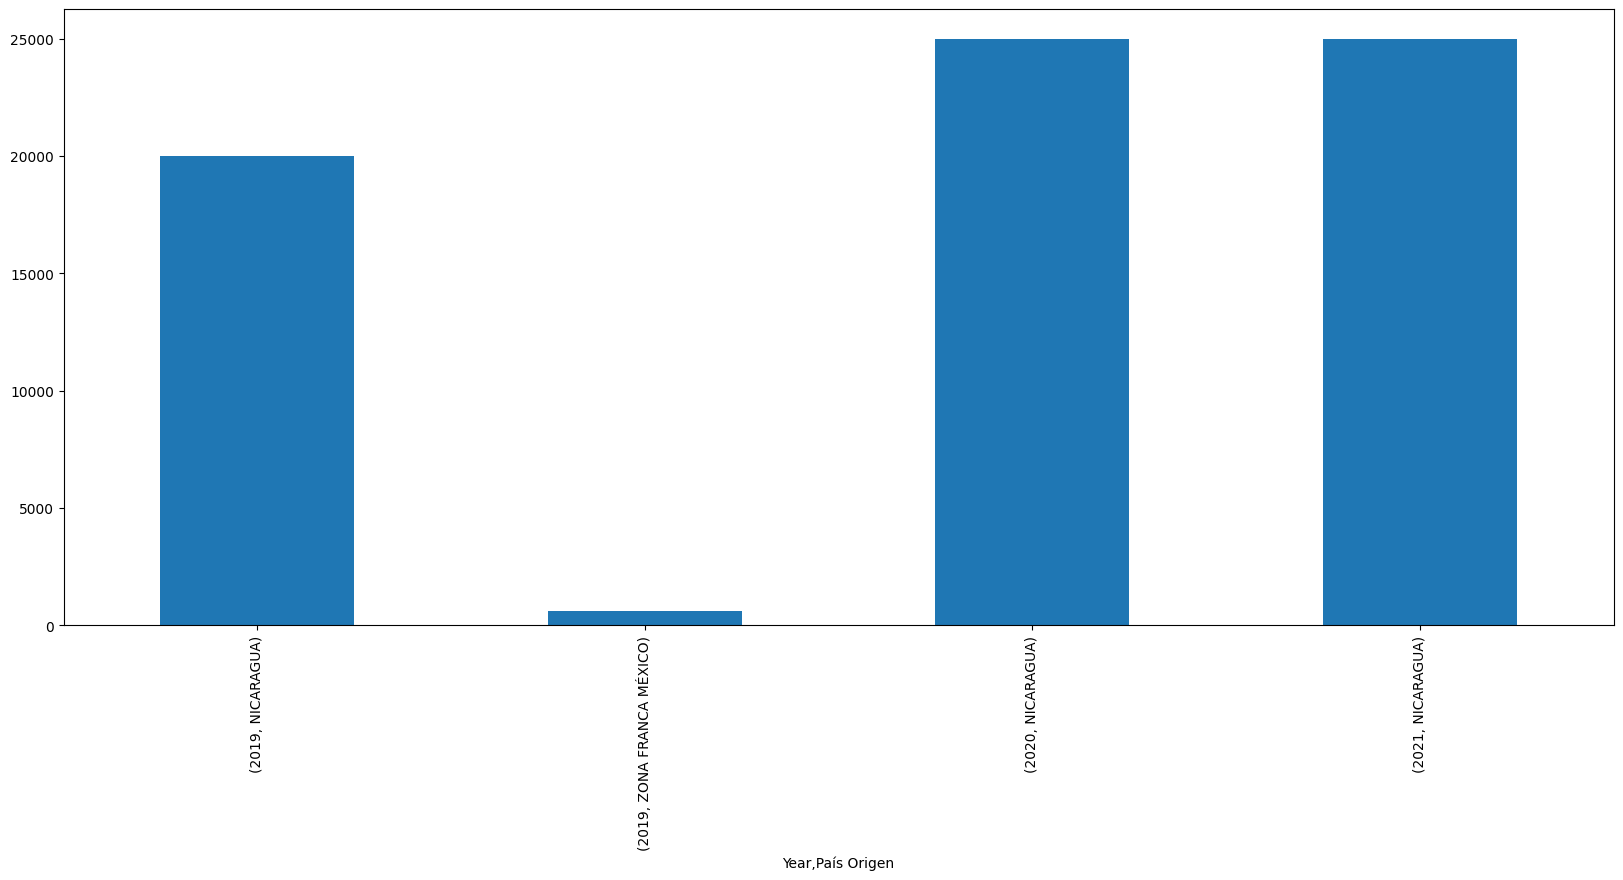

In [4]:
pais_por_anio = df.groupby(['Year','País Origen'])['Qty 1'].sum()
print(pais_por_anio)

fig = plt.figure(figsize = (20,8))
pais_por_anio.plot(kind="bar")